In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import time

In [2]:
sns.set()
pd.set_option('display.max_columns', None)

In [8]:
# !pip install tapi-yandex-metrika

In [ ]:
# !pip install --upgrade tapi-yandex-metrika==2020.10.20

In [3]:
from tapi_yandex_metrika import YandexMetrikaStats

[Создание приложения](https://oauth.yandex.ru/client/new/)

Отладочный токен:
https://oauth.yandex.ru/authorize?response_type=token&client_id=e08c5606a4764d09b0bff31f36281c9a

In [4]:
from id_data import yandex

In [5]:
ACCESS_TOKEN = yandex['ACCESS_TOKEN']
METRIC_IDS = yandex['METRIC_IDS']

In [6]:
api = YandexMetrikaStats(
    access_token=ACCESS_TOKEN,
)

Количество уникальных пользователей и визитов по дням за последние 30 дней

In [7]:
params = {
    'ids': METRIC_IDS, # наш счетчик
    'date1': '30daysAgo',
    'date2': 'yesterday',
    'sort': 'ym:s:date',
    'metrics': 'ym:s:users, ym:s:visits', # значения, которые получим
    'dimensions': 'ym:s:date', # группировка
    'accuracy': 'full',
    'limit': 1000 # количество элементов на странице
}

In [8]:
raw_result = api.stats().get(params=params)
raw_result

<TapiClient object
{   'contains_sensitive_data': False,
    'data': [   {   'dimensions': [{'name': '2025-05-08'}],
                    'metrics': [31.0, 33.0]},
                {   'dimensions': [{'name': '2025-05-09'}],
                    'metrics': [32.0, 34.0]},
                {   'dimensions': [{'name': '2025-05-10'}],
                    'metrics': [42.0, 42.0]},
                {   'dimensions': [{'name': '2025-05-11'}],
                    'metrics': [34.0, 35.0]},
                {   'dimensions': [{'name': '2025-05-12'}],
                    'metrics': [103.0, 110.0]},
                {   'dimensions': [{'name': '2025-05-13'}],
                    'metrics': [108.0, 113.0]},
                {   'dimensions': [{'name': '2025-05-14'}],
                    'metrics': [105.0, 107.0]},
                {   'dimensions': [{'name': '2025-05-15'}],
                    'metrics': [79.0, 85.0]},
                {   'dimensions': [{'name': '2025-05-16'}],
                    'metrics'

In [9]:
result = raw_result['data']

In [10]:
dict_data = {}

for i in range(len(result)):
    dict_data[i] = {
        'date': result[i]['dimensions'][0]['name'],
        'users': result[i]['metrics'][0],
        'visits': result[i]['metrics'][1]
    }

In [11]:
attendance = pd.DataFrame(dict_data).T

In [12]:
attendance

,date,users,visits
0,2025-05-08,31.0,33.0
1,2025-05-09,32.0,34.0
2,2025-05-10,42.0,42.0
3,2025-05-11,34.0,35.0
4,2025-05-12,103.0,110.0
5,2025-05-13,108.0,113.0
6,2025-05-14,105.0,107.0
7,2025-05-15,79.0,85.0
8,2025-05-16,78.0,82.0
9,2025-05-17,35.0,37.0


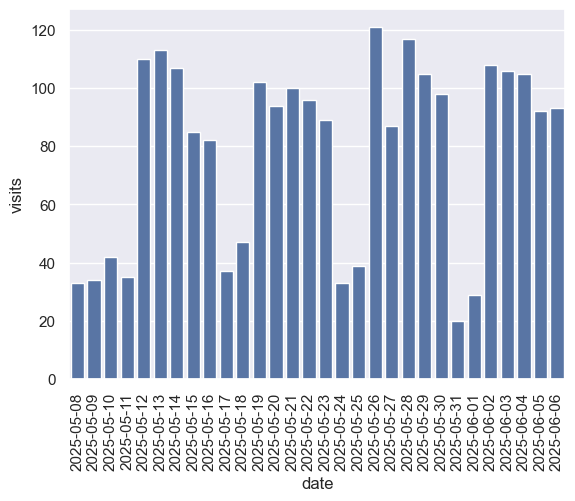

In [13]:
sns.barplot(data=attendance, x='date', y='visits')
plt.xticks(rotation=90);

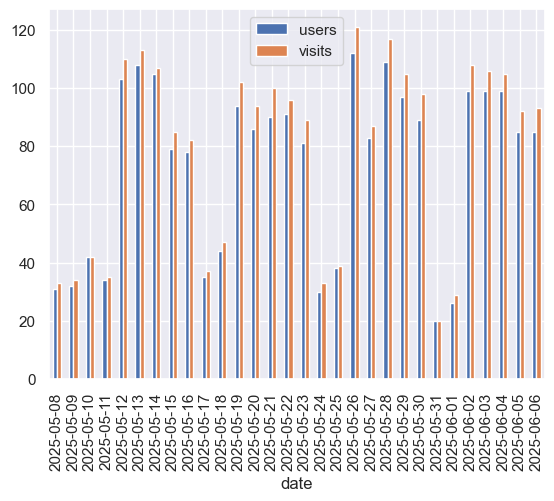

In [14]:
attendance.plot.bar(x='date');